In [17]:
import pandas as pd
import numpy as np
data=pd.read_csv("origindata.csv")
print(data.index)
%matplotlib inline

RangeIndex(start=0, stop=1048575, step=1)


In [18]:
#Index(['flight', 'name', 'date', 'time'], dtype='object')
name_index=set(data["name"].values)
date_index=set(data["date"].values)
flight_index=set(data["flight"].values)
merged_data={}
merged_data["flight"]=[]
merged_data["date"]=[]
for i in name_index:
    merged_data[i]=[]
merged_data

{360.0: [],
 361.0: [],
 364.0: [],
 365.0: [],
 366.0: [],
 367.0: [],
 368.0: [],
 369.0: [],
 370.0: [],
 378.0: [],
 379.0: [],
 380.0: [],
 637.0: [],
 641.0: [],
 644.0: [],
 645.0: [],
 648.0: [],
 649.0: [],
 652.0: [],
 654.0: [],
 655.0: [],
 656.0: [],
 660.0: [],
 661.0: [],
 662.0: [],
 663.0: [],
 664.0: [],
 665.0: [],
 668.0: [],
 669.0: [],
 670.0: [],
 675.0: [],
 676.0: [],
 678.0: [],
 679.0: [],
 680.0: [],
 681.0: [],
 682.0: [],
 683.0: [],
 684.0: [],
 685.0: [],
 'date': [],
 'flight': []}

In [19]:
def str_to_time(str_temp):
    try:
        str_list=str_temp.split(":")
        return int(str_list[0])*60+int(str_list[1])
    except:
        return -1
print(1)
data_02=pd.read_csv("02.csv")
#日期转换为数字
# 
# Index(['NO', 'flight', 'date', '641 靠梯桥', '644 清洁完成', '645开货仓', '648 首件行李',
#        '649 最后一件行李', '655 配餐完成', '660 机务完成', '661 通知上客', '662登机开始', '668关货仓 ',
#        '669 撤轮档', '670 牵引车 机务放行', '360预计近机位时间', '361机务完成', '364 引导车到位-删除',
#        '365加油完成 缺失较多', '366牵引完成 缺失较多', '367推算预计起飞', '368开客舱', '369上轮档',
#        '370登机结束', '378 配餐开始 8个', '379清洁开始', '380撤梯桥', '637关客舱', '缺失个数'],
#       dtype='object')
index_list=list(data_02.columns)[3:-1]
print(data.columns)
x=data_02["641 靠梯桥"][1]
print(str_to_time(x))
new_cleaned_data={}
for node_name in index_list:
    data_temp=data_02[node_name]
    new_cleaned_data[node_name]=[]
    for i in range(len(data_02)):
        node_temp=str_to_time(data_temp[i])
        new_cleaned_data[node_name].append(node_temp)
        if i%10000==0:
            print(i)
new_cleaned_data["date"]=list(data_02["date"])
new_cleaned_data["flight"]=list(data_02["flight"])
new_cleaned_data["缺失个数"]=list(data_02["缺失个数"])
pd.DataFrame(new_cleaned_data).to_csv("cleaned02.csv")

1
Index(['flight', 'name', 'date', 'time'], dtype='object')
673
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
0
10000
2000

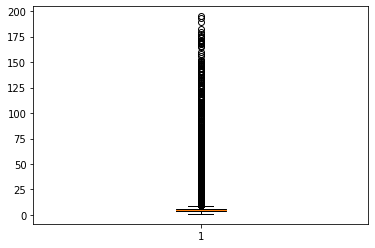

In [20]:
#数据补齐，根据
data_03=pd.read_csv("cleaned02.csv")
#补齐方法，按照航班来，用同一个时刻的航班的数据进行补充
#设定字段补齐的优先级顺序，用哪些字段来查找
#那么第一步就是求字段两两之间的时间差关系分布，用总体数据来求
## 
# Index(['NO', 'flight', 'date', '641 靠梯桥', '644 清洁完成', '645开货仓', '648 首件行李',
#        '649 最后一件行李', '655 配餐完成', '660 机务完成', '661 通知上客', '662登机开始', '668关货仓 ',
#        '669 撤轮档', '670 牵引车 机务放行', '360预计近机位时间', '361机务完成', '364 引导车到位-删除',
#        '365加油完成 缺失较多', '366牵引完成 缺失较多', '367推算预计起飞', '368开客舱', '369上轮档',
#        '370登机结束', '378 配餐开始 8个', '379清洁开始', '380撤梯桥', '637关客舱', '缺失个数'],
#       dtype='object')
#先根据直接关联的分布来补充第一步数据，统计两两直接关联的数据的结果表
#引导车与上轮档数据
def get_diff_of_two_node(A,B):
    data_temp=data_03[["369上轮档","364 引导车到位-删除"]]
    data_temp=data_temp[data_temp["369上轮档"]!=-1]
    data_temp=data_temp[data_temp["364 引导车到位-删除"]!=-1]
    return data_temp["369上轮档"]-data_temp["364 引导车到位-删除"]
x=get_diff_of_two_node(1,2)
import matplotlib.pyplot as plt
y=[]
for i in x:
    if i>0 and i<200:
        y.append(i)
plt.boxplot(y)
plt.show()
y.sort()

In [21]:
#利用就近补充原则，寻找两两变量之间的关系，并且有一个先后顺序，利用条件概率，寻找在当前值为X的时候，另外节点取值最大概率的值作为补充值
#第一步计算一个列表，得到两个变量不为空的一个表，
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
from pgmpy.estimators import ParameterEstimator
def get_diff_of_two_node2(A,B):
    data_temp=data_03[[A,B]]
    data_temp=data_temp[data_temp[A]!=-1]
    data_temp=data_temp[data_temp[B]!=-1]
    return data_temp
# A,B="369上轮档","364 引导车到位-删除"
# two_datatest=get_diff_of_two_node2(A,B)
# model = BayesianModel([(A,B)])
# two_nodedata=get_diff_of_two_node2(A,B)
# model.fit(two_nodedata, estimator=MaximumLikelihoodEstimator)
# infer=VariableElimination(model)
# print(infer.map_query([B], evidence={A: 90}))
name_list=[ '641 靠梯桥', '644 清洁完成', '645开货仓', '648 首件行李',
       '649 最后一件行李', '655 配餐完成', '660 机务完成', '661 通知上客', '662登机开始', '668关货仓 ',
       '669 撤轮档', '670 牵引车 机务放行', '360预计近机位时间', '361机务完成', '364 引导车到位-删除',
       '365加油完成 缺失较多', '366牵引完成 缺失较多', '367推算预计起飞', '368开客舱', '369上轮档',
       '370登机结束', '378 配餐开始 8个', '379清洁开始', '380撤梯桥', '637关客舱']
def get_all_cpb_infer_models():
    model_dict={}
    for i in range(len(name_list)-1):
        for j in range(i+1,len(name_list)):
            A=name_list[i]
            B=name_list[j]
            name_compare=A+"_"+B
            print(A,B)
            try:
                model = BayesianModel([(A,B)])
                two_nodedata=get_diff_of_two_node2(A,B)
                model.fit(two_nodedata, estimator=MaximumLikelihoodEstimator)
                infer_temp=VariableElimination(model)
                #print(infer_temp.map_query([B], evidence={A: 90})) #查询的代码
                model_dict[name_compare]=infer_temp
                
            except:
                print(name_compare,"failed****************")
                model_dict[name_compare]=-1
    return model_dict
all_model_cpb=get_all_cpb_infer_models()

641 靠梯桥 644 清洁完成
641 靠梯桥 645开货仓
641 靠梯桥 648 首件行李
641 靠梯桥 649 最后一件行李
641 靠梯桥 655 配餐完成
641 靠梯桥 660 机务完成
641 靠梯桥 661 通知上客
641 靠梯桥 662登机开始
641 靠梯桥 668关货仓 
641 靠梯桥 669 撤轮档
641 靠梯桥 670 牵引车 机务放行
641 靠梯桥 360预计近机位时间
641 靠梯桥 361机务完成
641 靠梯桥 364 引导车到位-删除
641 靠梯桥 365加油完成 缺失较多
641 靠梯桥 366牵引完成 缺失较多
641 靠梯桥 367推算预计起飞
641 靠梯桥 368开客舱
641 靠梯桥 369上轮档
641 靠梯桥 370登机结束
641 靠梯桥 378 配餐开始 8个
641 靠梯桥 379清洁开始
641 靠梯桥 380撤梯桥
641 靠梯桥 637关客舱
644 清洁完成 645开货仓
644 清洁完成 648 首件行李
644 清洁完成 649 最后一件行李
644 清洁完成 655 配餐完成
644 清洁完成 660 机务完成
644 清洁完成 661 通知上客
644 清洁完成 662登机开始
644 清洁完成 668关货仓 
644 清洁完成 669 撤轮档
644 清洁完成 670 牵引车 机务放行
644 清洁完成 360预计近机位时间
644 清洁完成 361机务完成
644 清洁完成 364 引导车到位-删除
644 清洁完成 365加油完成 缺失较多
644 清洁完成 366牵引完成 缺失较多
644 清洁完成 367推算预计起飞
644 清洁完成 368开客舱
644 清洁完成 369上轮档
644 清洁完成 370登机结束
644 清洁完成 378 配餐开始 8个
644 清洁完成 379清洁开始
644 清洁完成 380撤梯桥
644 清洁完成 637关客舱
645开货仓 648 首件行李
645开货仓 649 最后一件行李
645开货仓 655 配餐完成
645开货仓 660 机务完成
645开货仓 661 通知上客
645开货仓 662登机开始
645开货仓 668关货仓 
645开货仓 669 撤轮档
645开货仓 670 牵引车 机务放行
645开货仓 360预计近机位

In [22]:
##下一步设计补齐数据的方法，为每个节点寻找最大相关系数变量，计算相关系数表，根据相关系数的优先级来完成数据的填充
##
corr_dict={}
for i in range(len(name_list)-1):
        for j in range(i+1,len(name_list)):
            A=name_list[i]
            B=name_list[j]
            name_compare=A+"_"+B
            print(A,B)
            try:
                two_nodedata=get_diff_of_two_node2(A,B)
                coor=two_nodedata.corr().iloc[0,1] #提取到的两个变量之间的相关系数
                print(coor)
                if coor>0:
                    corr_dict[name_compare]=coor
                else:
                    corr_dict[name_compare]=-1
            except:
                corr_dict[name_compare]=-1

641 靠梯桥 644 清洁完成
0.06946994199297282
641 靠梯桥 645开货仓
0.9389823913638158
641 靠梯桥 648 首件行李
0.8192427355940077
641 靠梯桥 649 最后一件行李
0.7542503245176069
641 靠梯桥 655 配餐完成
0.4406713509650409
641 靠梯桥 660 机务完成
-0.04924379053325543
641 靠梯桥 661 通知上客
0.019330838749976313
641 靠梯桥 662登机开始
0.4890072213200213
641 靠梯桥 668关货仓 
0.3178731637879125
641 靠梯桥 669 撤轮档
0.151192056561255
641 靠梯桥 670 牵引车 机务放行
0.38098556476898116
641 靠梯桥 360预计近机位时间
0.9010944106314054
641 靠梯桥 361机务完成
-0.018032553675095014
641 靠梯桥 364 引导车到位-删除
0.9103574888273012
641 靠梯桥 365加油完成 缺失较多
-0.12389167211114582
641 靠梯桥 366牵引完成 缺失较多
0.21233760019548992
641 靠梯桥 367推算预计起飞
-0.07840263734286902
641 靠梯桥 368开客舱
0.9475846607878642
641 靠梯桥 369上轮档
0.9325301251499187
641 靠梯桥 370登机结束
0.34609317340863854
641 靠梯桥 378 配餐开始 8个
0.7550457431111511
641 靠梯桥 379清洁开始
0.45133425650031433
641 靠梯桥 380撤梯桥
0.12309633142914822
641 靠梯桥 637关客舱
0.26988755207818277
644 清洁完成 645开货仓
0.2306356947990487
644 清洁完成 648 首件行李
0.8090900677946522
644 清洁完成 649 最后一件行李
0.8118208501649196


In [23]:
#开始填充数据，编写一个函数查找可行的最大的相关系数的值，然后再利用该值去填充
#每一行进行数据获取
def get_corr_data(A,B):
    name=A+"_"+B
    name2=B+"_"+A
    try:
        resul=corr_dict[name]
    except:
        resul=corr_dict[name2] 
    return resul

def find_big_coor_and_name(name_index,data_line_temp):
    compare_name_big=""
    coor_big=0
    for compare_name in name_list: #循环比较找到最大的结果
        if compare_name!=name_index and data_line_temp[compare_name]!=-1: #该行不为-1，也就是不缺失
            coor_temp=get_corr_data(name_index,compare_name)
            # print(compare_name,name_index,coor_temp)
            if coor_temp>coor_big:
                coor_big=coor_temp
                compare_name_big=compare_name 
    
    compare_valule=data_line_temp[compare_name_big]
    # print(compare_name_big,name_index,coor_big,compare_valule)
    return compare_name_big,compare_valule
def get_bayesin_model(A,B):
    name=A+"_"+B
    name2=B+"_"+A
    try:
        resul=all_model_cpb[name]
    except:
        resul=all_model_cpb[name2] 
    return resul
def find_loss_values(nameindex,compare_big_coor_name,compare_big_value):
    model=get_bayesin_model(nameindex,compare_big_coor_name)
    try:
        x=model.map_query([nameindex], evidence={compare_big_coor_name: compare_big_value})
        return list(x.values())[0]   
    except:
        return -1
new_data={}
for i in data_03.columns:
    new_data[i]=[]
# print(new_data)
"""
for i in range(len(data_03)):
    data_line_temp=data_03.iloc[i,:] #每行进行索引数据
    # print(data_line_temp)
    for name_index in data_03.columns:
        data_temp=data_line_temp[name_index]
        if data_temp != -1: #如果不是缺失值或者是航班计划等字段，则放进去
            new_data[name_index].append(data_temp) 
        else: #如果为缺失值，则进行填充 #第一步找到最相关系数最大的非0的最大字段
            #先找到非空缺的字段，再选择最大的系数值
            try:
                compare_big_coor_name,compare_big_value=find_big_coor_and_name(name_index,data_line_temp)
                #加载填充值的模型，
                data_temp2=find_loss_values(name_index,compare_big_coor_name,compare_big_value)
                new_data[name_index].append(data_temp2)
                print(data_temp2)
            except:
                new_data[name_index].append(-1)
    if i%10000==0:
            print(i)
    # print(new_data)
pd.DataFrame(new_data).to_csv("cleand03.csv")
"""

'\nfor i in range(len(data_03)):\n    data_line_temp=data_03.iloc[i,:] #每行进行索引数据\n    # print(data_line_temp)\n    for name_index in data_03.columns:\n        data_temp=data_line_temp[name_index]\n        if data_temp != -1: #如果不是缺失值或者是航班计划等字段，则放进去\n            new_data[name_index].append(data_temp) \n        else: #如果为缺失值，则进行填充 #第一步找到最相关系数最大的非0的最大字段\n            #先找到非空缺的字段，再选择最大的系数值\n            try:\n                compare_big_coor_name,compare_big_value=find_big_coor_and_name(name_index,data_line_temp)\n                #加载填充值的模型，\n                data_temp2=find_loss_values(name_index,compare_big_coor_name,compare_big_value)\n                new_data[name_index].append(data_temp2)\n                print(data_temp2)\n            except:\n                new_data[name_index].append(-1)\n    if i%10000==0:\n            print(i)\n    # print(new_data)\npd.DataFrame(new_data).to_csv("cleand03.csv")\n'

In [ ]:
#对每一个字段进行补充，首先寻找该字段的相关系数的排序，得到一个字典
#然后再利用该字典进行筛选数据进行填充，要么为-1，要不不为-1，依次填充，建立模型
#遍历每一个字段
corr_dict_sorted={} #计算好的按照相关度排序的节点名称
for A in name_list:
    temp_dict={}
    for B in name_list:
        if B!=A:
            print(A,B)
            temp_dict[B]=get_corr_data(A,B)
    corr_dict_sorted[A] =sorted(temp_dict, key=lambda x:temp_dict[x])
pd.DataFrame(corr_dict_sorted).to_csv("corrsorted.csv")   

641 靠梯桥 644 清洁完成
641 靠梯桥 645开货仓
641 靠梯桥 648 首件行李
641 靠梯桥 649 最后一件行李
641 靠梯桥 655 配餐完成
641 靠梯桥 660 机务完成
641 靠梯桥 661 通知上客
641 靠梯桥 662登机开始
641 靠梯桥 668关货仓 
641 靠梯桥 669 撤轮档
641 靠梯桥 670 牵引车 机务放行
641 靠梯桥 360预计近机位时间
641 靠梯桥 361机务完成
641 靠梯桥 364 引导车到位-删除
641 靠梯桥 365加油完成 缺失较多
641 靠梯桥 366牵引完成 缺失较多
641 靠梯桥 367推算预计起飞
641 靠梯桥 368开客舱
641 靠梯桥 369上轮档
641 靠梯桥 370登机结束
641 靠梯桥 378 配餐开始 8个
641 靠梯桥 379清洁开始
641 靠梯桥 380撤梯桥
641 靠梯桥 637关客舱
644 清洁完成 641 靠梯桥
644 清洁完成 645开货仓
644 清洁完成 648 首件行李
644 清洁完成 649 最后一件行李
644 清洁完成 655 配餐完成
644 清洁完成 660 机务完成
644 清洁完成 661 通知上客
644 清洁完成 662登机开始
644 清洁完成 668关货仓 
644 清洁完成 669 撤轮档
644 清洁完成 670 牵引车 机务放行
644 清洁完成 360预计近机位时间
644 清洁完成 361机务完成
644 清洁完成 364 引导车到位-删除
644 清洁完成 365加油完成 缺失较多
644 清洁完成 366牵引完成 缺失较多
644 清洁完成 367推算预计起飞
644 清洁完成 368开客舱
644 清洁完成 369上轮档
644 清洁完成 370登机结束
644 清洁完成 378 配餐开始 8个
644 清洁完成 379清洁开始
644 清洁完成 380撤梯桥
644 清洁完成 637关客舱
645开货仓 641 靠梯桥
645开货仓 644 清洁完成
645开货仓 648 首件行李
645开货仓 649 最后一件行李
645开货仓 655 配餐完成
645开货仓 660 机务完成
645开货仓 661 通知上客
645开货仓 662登机开始
645开货仓 668关货仓 
64

In [ ]:
##对数据进行筛选，第一步筛选出为空的字段
new_data=data_03.copy() 
def fill_nan_new_data(data,nodea,nodeb):
    """
    :param data:提取出来的部分数据，标识nodea为空的数据，且nodeb不为空的数据 
    :param nodea: 需要填充的字段
    :param nodeb: 用来进行相关联的字段
    :return: nodeb也为空的字段
    """
    #对其进行填充
    inder_mode=get_bayesin_model(nodea,nodeb)
    for i in data.index: #对每一行的数据进行填充
        nodeb_value=data.loc[i,nodeb]
        try:
            x=inder_mode.map_query([nodea], evidence={nodeb: nodeb_value},show_progress=False)
            result=list(x.values())[0]   
        except:
             result=-1
        #进行填值处理
        new_data.loc[i,nodea]=result
        print(new_data.loc[i,nodea])
    return data[data[nodeb]==-1]

#创建一个新的数据用来作为修改的值的结果
for node_name in name_list:
    data_node_temp=data_03[data_03[node_name]==-1]#对每一个node的缺失值进行填充
    #按照相关度进行索引填充
    node_dict_list=corr_dict_sorted[node_name]
    for node_b_name in node_dict_list:
        #先寻找node_b_name 不为空的值，提取出来
        data_node_temp=data_node_temp[data_node_temp[node_b_name]!=-1]
        #进行填充,并返回node_b_name 为空的值，利用循环进行下一个node不为空进行填充
        data_node_temp=fill_nan_new_data(data_node_temp,node_name,node_b_name)

        

 
 
    



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it

90
385
155
610
177
185
198
135
356
705
480
408
424
264
145
87
580
417
476
329
485
182
479
544
310
302
538
231
130
490
388
213
675
317
300
254
398
286
744
191
302
300
136
530
302
286
95
445
611
400
388
192
500
422
750
179
426
405
356
123
120
310
413
145
264
264
113
672
210
324
395
210
113
218
440
95
725
117
345
610
563
724
419
698
117
765
538
264
528
385
566
279
274
70
412
254
215
267
563
178
93
141
90
187
566
317
462
530
474
269
407
407
179
610
131
265
231
256
381
118
117
311
530
674
383
400
155
403
122
120
385
317
381
152
408
766
360
543
367
130
575
102
300
131
283
580
398
210
108
417
231
773
375
338
232
293
474
720
575
179
290
179
371
524
155
619
214
385
437
288
385
575
70
490
62
213
269
185
729
116
120
611
269
650
426
589
775
300
441
383
338
540
178
173
300
295
388
265
116
544
620
484
330
385
494
650
405
188
487
647
269
729
658
376
358
658
239
580
595
388
530
347
650
287
231
156
371
117
718
403
168
286
530
577
338
240
178
330
196
191
108
90
62
435
665
117
440
215
94
773
163
566
120
